# 01-CIFAR10

![](https://images.unsplash.com/photo-1493723843671-1d655e66ac1c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [LUM3N](https://unsplash.com/photos/-RBuQ2PK_L8)


We will work on the CIFAR10 dataset. If you want to know more about this dataset, you can check information [here](https://www.cs.toronto.edu/~kriz/cifar.html).

You can download the CIFAR10 dataset using Keras. To know how to do it, check [here](https://keras.io/datasets/). If the memory of your laptop is not big (e.g. 4GB), take only a subsample of the CIFAR10 dataset: for example 10000 samples in train and 2000 in test.

In [4]:
# imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.datasets import cifar10

In [28]:
# TODO: Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Now inspect the data, check the number of images, their sizes, and display some of them.

In [29]:
# TODO: Explore the data, display some input images
print(X_train.shape) ## (50000, 32, 32, 3) ??
print(y_train.shape)

## qu'est-ce que la 4ème dim dans X ??
X_train = X_train[:,:,:,0]
X_test = X_test[:,:,:,0]
print(X_train.shape)

(50000, 32, 32, 3)
(50000, 1)
(50000, 32, 32)


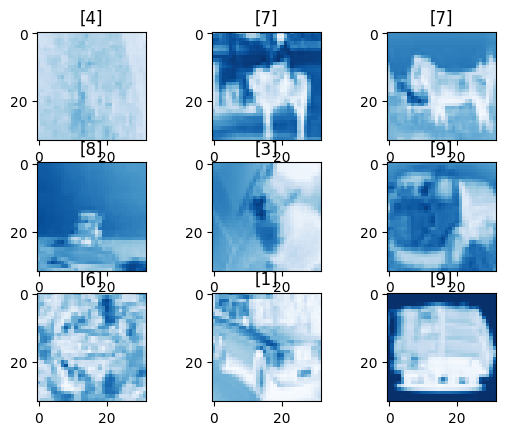

In [21]:
# display a few images
from matplotlib import pyplot as plt
import numpy as np

def multiplots(X, y):
    # voir pour générer les rows randomly
    x_max = y_max = 3
    rows = [10, 11, 12, 100, 101, 102, 200,201,202] 
    fig, axs = plt.subplots(x_max, y_max)    
    
    for i in range(x_max):
        for j in range(y_max):
            row = x_max * i + j
            imag = X[rows[row]]
            imag = np.array(imag, dtype='float')
            pixels = imag.reshape((X.shape[1], X.shape[2]))
            axs[i, j].imshow(pixels, vmin=0, vmax=255, cmap='Blues')
            axs[i, j].set_title(y[rows[row]])
    
multiplots(X_train, y_train)

Make the data preprocessing now: rescale the input data, put the labels to one hot encoding.

In [58]:
# TODO: Make the data preparation
# flatten arrays
from sklearn.preprocessing import MinMaxScaler

def preproc_X_data(x_train, x_test):
    X_flat_train = x_train.reshape(x_train.shape[0],-1)
    X_flat_test  = x_test.reshape(x_test.shape[0],-1)

    ## SCALE THE FEATURES (pixels grey levels)
    # numeric features scaling
    from sklearn.preprocessing import MinMaxScaler

    print(X_flat_train.shape)

    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(X_flat_train)
    x_test  = scaler.transform(X_flat_test)

    return x_train, x_test

X_train, X_test = preproc_X_data(X_train, X_test)

(50000, 3072)


In [33]:
### one-hot-encode target (names)
print(np.unique(y_train))
nb_classes = len(np.unique(y_train))
print(f'nb_classes: {nb_classes}')
y_train_cat = keras.utils.to_categorical(y_train, num_classes=nb_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=nb_classes)

[0 1 2 3 4 5 6 7 8 9]
nb_classes: 10


Now build your model with Keras. Build your neural network architecture.

Again, begin with a quite light architecture with 3 hidden layers and 30 units per layer.

In [40]:
# TODO: Build your model
## ReLU activation dans les HLs
def multi_class_mlp(input_dim: tuple[int, ...], nb_hls: int, nb_units: int, nb_outputs: int) -> Sequential:
    # Sequential model
    model = Sequential()

    # Input
    model.add(Input(input_dim))

    # Loop onto Hidden Layers
    for lay in range(nb_hls):
        model.add(Dense(nb_units, activation="relu"))

    # Output Layers
    model.add(Dense(nb_outputs, activation="softmax"))
    
    return model

inp_dim = X_train.shape[1]
#### VU EN COURS: TJS commencer par une seule couche
### avec 3hls x 30 units => 32920 params dans le MLP
### en fait quasi autant avec 1 HL de 30 units
mlp = multi_class_mlp(input_dim=(inp_dim,),nb_hls=3, nb_units=30, nb_outputs=nb_classes)
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 30)                30750     
                                                                 
 dense_15 (Dense)            (None, 30)                930       
                                                                 
 dense_16 (Dense)            (None, 30)                930       
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 32,920
Trainable params: 32,920
Non-trainable params: 0
_________________________________________________________________


Now compile and fit your model on your training data. Add callbacks to have early stopping (with a patience of 30 epochs for example) and tensorboard information.

In [41]:
# TODO: Build your model
## callbacks and early stopping of 30 epochs
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

## Compilation
mlp.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

# Instantiate a callback: here 30 epochs without improvement of the val_loss will stop training
callbacks = [EarlyStopping(monitor='val_loss', patience=30),
             TensorBoard(log_dir='./Graphs_MLP', histogram_freq=0, write_graph=True, write_images=True)]

# Fitting - Then use it when you fit your model
mlp.fit(x = X_train,
        y = y_train_cat,
        batch_size = 64,
        epochs = 50,
        validation_data=(X_test, y_test_cat),
        callbacks = callbacks)

Epoch 1/50
782/782 [==============================] - 3s 3ms/step - loss: 2.1144 - accuracy: 0.2141 - val_loss: 2.0363 - val_accuracy: 0.2560
Epoch 2/50
782/782 [==============================] - 2s 3ms/step - loss: 2.0151 - accuracy: 0.2622 - val_loss: 2.0094 - val_accuracy: 0.2666
Epoch 3/50
782/782 [==============================] - 2s 3ms/step - loss: 1.9808 - accuracy: 0.2780 - val_loss: 1.9623 - val_accuracy: 0.2910
Epoch 4/50
782/782 [==============================] - 2s 3ms/step - loss: 1.9565 - accuracy: 0.2878 - val_loss: 1.9619 - val_accuracy: 0.2883
Epoch 5/50
782/782 [==============================] - 2s 3ms/step - loss: 1.9393 - accuracy: 0.2955 - val_loss: 1.9450 - val_accuracy: 0.2984
Epoch 6/50
782/782 [==============================] - 2s 3ms/step - loss: 1.9220 - accuracy: 0.3037 - val_loss: 1.9604 - val_accuracy: 0.2844
Epoch 7/50
782/782 [==============================] - 2s 3ms/step - loss: 1.9110 - accuracy: 0.3068 - val_loss: 1.9138 - val_accuracy: 0.3080
Epoch 

In [ ]:
## ok ça marche avec TensorBord : il suffit de suivre la proc deu cours
## depuis le Terminal Ubuntu: se rendre au niveaau sup de : Graphs_MLP


Compute the accuracy of your model once it has been trained.

In [42]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import classification_report, accuracy_score
loss_test, accur_test = mlp.evaluate(X_test, y_test_cat, batch_size=128)
print("test loss, test acc:", loss_test, accur_test)

79/79 [==============================] - 0s 2ms/step - loss: 1.8337 - accuracy: 0.3395
test loss, test acc: 1.8336658477783203 0.3395000100135803


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? Feel free to try.

To have a better understanding of your model, you can also check the learning curves on TensorBoard and interpret them.

One solution to improve your model might be data augmentation. For example, we can flip horizontally our images. Basically, this would be like watching them into a mirror.

To do so, you can use numpy method `flip` for example, and then display a flipped image and the regular image.

/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


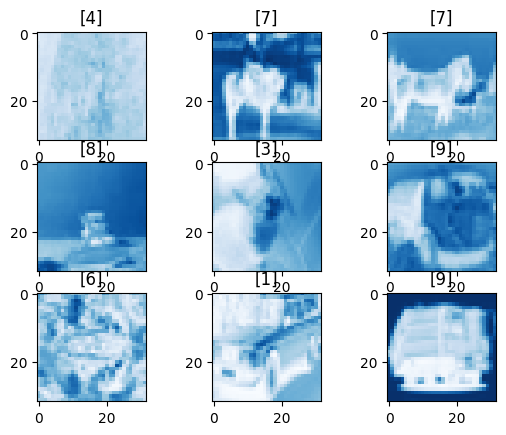

In [69]:
# TODO: Augment your data by flipping images horizontally
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:,:,:,0]
X_test = X_test[:,:,:,0]

X_train_hflip = np.flip(X_train, axis=2) ##X_train already flattened
#for idx_img in range(0,X_train.shape[0]):
#    X_train_hflip[idx_img,:,:] = np.fliplr(X_train_hflip[idx_img,:,:])

multiplots(X_train_hflip, y_train)

Now concatenate your training set to have both regular and flipped images in it. Do the same for the associated labels (labels remain the same for flipped images). If your computer memory is not big enough, flip only a subsample of images.

In [70]:
# TODO: Create a new training set with both regular and flipped images
X_train = np.concatenate([X_train, X_train_hflip], axis=0) #refaire le scaling et le flattening
y_train = np.concatenate([y_train, y_train], axis=0)

X_train, X_test = preproc_X_data(X_train, X_test)
X_train.shape

y_train_cat = keras.utils.to_categorical(y_train, num_classes=nb_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=nb_classes)

(100000, 1024)


Once your data is augmented, retrain your model, and see if it can improve your performances.

In [71]:
# TODO: train your model and display the performances
inp_dim = X_train.shape[1]
mlp = multi_class_mlp(input_dim=(inp_dim,),nb_hls=3, nb_units=30, nb_outputs=nb_classes)
mlp.summary()

## Compilation
mlp.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

# Instantiate a callback: here 30 epochs without improvement of the val_loss will stop training
callbacks = [EarlyStopping(monitor='val_loss', patience=30),
             TensorBoard(log_dir='./Graphs_MLP', histogram_freq=0, write_graph=True, write_images=True)]

# Fitting - Then use it when you fit your model
mlp.fit(x = X_train,
        y = y_train_cat,
        batch_size = 64,
        epochs = 50,
        validation_data=(X_test, y_test_cat),
        callbacks = callbacks)

loss_test, accur_test = mlp.evaluate(X_test, y_test_cat, batch_size=128)
print("test loss, test acc:", loss_test, accur_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                30750     
                                                                 
 dense_23 (Dense)            (None, 30)                930       
                                                                 
 dense_24 (Dense)            (None, 30)                930       
                                                                 
 dense_25 (Dense)            (None, 10)                310       
                                                                 
Total params: 32,920
Trainable params: 32,920
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0575 - accuracy: 0.2450 - val_loss: 1.9694 - val_accuracy: 0.2887
Epoch 2/50
1563/1563 [================

In [73]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import classification_report, accuracy_score
loss_test2, accur_test2 = mlp.evaluate(X_test, y_test_cat, batch_size=64)
print("test loss2, test acc2:", loss_test2, accur_test2)
## voir pourquoi j'ai 37% sur test au lieu de 41% attendu

157/157 [==============================] - 0s 2ms/step - loss: 1.7562 - accuracy: 0.3706
test loss2, test acc2: 1.7562377452850342 0.37059998512268066


Does it improve your performances? On my side yes it does, from 34% accuracy to 41%, quite a big improvement (even if this is not so good).

Now feel free to improve the performances of your model by making more data augmentation (adding rotations, zooming...), trying to add layers or units, or playing with hyperparameters.